In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from Species import *

Oceanic Whitetip Shark


In [2]:
sharks = pd.read_csv('./GSAF5.csv', sep = ',', engine='python') #Usar engine='python', porque si no da error de lectura.

In [3]:
display(sharks.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


# Hipótesis inicial: 
        -De los ataques registrados: ¿Con el paso de los años se ha ido aumentando la tasa muerte/ataque? 
            ¿En números totales: cómo han evolucionado los ataques y las muertes?
            
        -De los resultados obtenidos sobre la evolución de muertes, intentar encontrar una posible relación 
        con la evolución de las películas sobre tiburones.
        
# Siguientes pasos de la hipótesis:
        - Si es posible, intentar ver que (co)relación hay entre la actividad que realizaba mientras recibió 
        el ataque y el aumento de ataques recibidos 
        - La evolución del peso de la actividad que realizaba

In [4]:
print(sharks.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [5]:
display(sharks.isnull().sum()) 
# Podemos ver que las columnas 'Unnamed: 22' y 'Unnamed: 23' vienen con casi todos los registros vacíos.

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [6]:
sharks_copy = sharks.copy()
#Hago una copia de sharks para hacer la limpieza del dataSet en un dataframe aparte

In [7]:
sharks_copy.rename(str.strip, axis='columns', inplace=True)
sharks_copy.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
#Elimino columnas 'Unnamed: 22' y 'Unnamed: 23', puesto que vienen sin datos.
sharks_copy.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1, inplace = True)
sharks_copy.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [9]:
display(sharks[(sharks['Case Number']!= sharks['Case Number.1'])|(sharks['Case Number']!= sharks['Case Number.2'])][['Case Number', 'Case Number.1', 'Case Number.2']])
#Comprobamos que únicamente hay 13 registros en los que la info de las columnas es diferente, 
# y se puede ver que difiere en formato (. , /), que ya sustituiré más adelante si fuera necesario

,Case Number,Case Number.1,Case Number.2
4,2016.09.15,2016.09.16,2016.09.15
33,2016.07.14.4,2016.07.14.R,2016.07.14.4
97,2016.01.24.b,2015.01.24.b,2016.01.24.b
116,2015.12.23,2015.11.07,2015.12.23
121,2015.10.28.a,2015.10.28,2015.10.28.a
169,2015.07-10,2015.07.10,2015.07.10
3296,1967.07.05,1967/07.05,1967.07.05
3569,"1962,08.30.b",1962.08.30.b,"1962,08.30.b"
3654,1961.09.02.R,"1961.09,06.R",1961.09.02.R
4177,1952.08.05,1952.08.04,1952.08.05


In [10]:
#Elimino columnas 'Case Number.1' y 'Case Number.2', puesto que sus valores son los mismos que los de la columna Case Number.
sharks_copy.drop(['Case Number.1', 'Case Number.2'], axis=1, inplace = True)
sharks_copy.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5989


In [11]:
#Elimino columnas 'pdf', puesto que sus valores son los nombres de los archivos, pero no disponemos de ellos.
sharks_copy.drop(['pdf'], axis=1, inplace = True)
sharks_copy.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href formula,href,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5989


In [12]:
sharks_copy[['Case Number','Investigator or Source']].head()

,Case Number,Investigator or Source
0,2016.09.18.c,"Orlando Sentinel, 9/19/2016"
1,2016.09.18.b,"Orlando Sentinel, 9/19/2016"
2,2016.09.18.a,"Orlando Sentinel, 9/19/2016"
3,2016.09.17,"The Age, 9/18/2016"
4,2016.09.15,"The Age, 9/16/2016"


In [13]:
#Para el análisis que voy a realizar no necesito saber quién ha realizado el estudio ni lo ha publicado. DELETE

In [14]:
sharks_copy.drop(['Investigator or Source'], axis=1, inplace = True)
sharks_copy.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula,href,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5989


In [15]:
display(sharks[(sharks['href formula']!= sharks['href'])][['href formula', 'href']].shape)


(54, 2)

In [16]:
#Comprobamos que las columnas href y href formula difieren, por lo que voy a eliminar la columna href.
sharks_copy.drop(['href'], axis=1, inplace = True)
sharks_copy.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,5989


In [17]:
sharks["Year"].describe() #Distribución por año del suceso
#Hay datos con año 0, empiezo a ver la información que viene en la columna 'date' de los casos con año 0. (sharks_0)

count    5992.000000
mean     1925.204606
std       286.473712
min         0.000000
25%      1942.000000
50%      1975.000000
75%      2003.000000
max      2016.000000
Name: Year, dtype: float64

In [18]:
sharks_copy[sharks_copy["Year"] == 0].shape
#Tan solo hay 124 registros con Year == 0--> DELETE
cols_to_delete= sharks_copy[(sharks_copy['Year']==0)]
cols_to_delete['Case Number'].head()

5868     0.0214
5869     0.0336
5870     0.0493
5871     0.0725
5872    ND-0153
Name: Case Number, dtype: object

In [19]:
sharks_copy.shape

(5992, 17)

In [20]:
sharks_copy.drop(cols_to_delete.index, axis=0, inplace = True)
sharks_copy.shape

(5868, 17)

In [21]:
#Funciones para sacar el día,mes y año del suceso desde el campo Case Number.

a='2016.09.18.c'
b='2016.09.17'
def year(string):
    dev=string[0:4]
    return int(dev)
def month(string):
    dev=string[5:7]
    return int(dev)
def day(string):
    dev=string[8:10]
    return int(dev)

#def day(string):
 #   dev=string
  #  w= re.findall('\.\w$',string)
   # w = str(w)
    #dev = re.sub(w,'',dev)
    #dev = dev[6:]
    #return dev
#c[:4] --- YEAR
day(a)

18

In [22]:
sharks_copy['Year2']=sharks_copy['Case Number'].apply(year)
sharks_copy['Year2'].value_counts().head()

2015    139
2011    128
2014    125
2013    122
2008    121
Name: Year2, dtype: int64

In [23]:
sharks_copy['Month']=sharks_copy['Case Number'].apply(month)
sharks_copy['Month'].value_counts()

7     634
8     580
9     524
1     500
6     474
12    423
4     410
10    407
3     398
0     398
11    393
5     368
2     359
Name: Month, dtype: int64

In [24]:
sharks_copy.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'href formula', 'original order', 'Year2', 'Month'],
      dtype='object')

In [25]:
display(sharks_copy[(sharks_copy['Year']!= sharks_copy['Year2'])][['Year', 'Year2']])
#Compruebo en que difieren los años obtenidos del Case number con los registrados en YEAR, y se
# ve que tan solo hay 5 registros diferentes. Me quedo con la original (YEAR)--> DROP YEAR2

,Year,Year2
2449,1969,1989
3662,1971,1961
4312,1848,1948
4983,1922,1923
5043,1919,1900


In [26]:
sharks_copy.iloc[4312]
#Intento ver qué ha podido fallar.

Case Number                                            1948.09.17.R
Date                                           Reported 17-Sep-1848
Year                                                           1848
Type                                                     Unprovoked
Country                                                      TURKEY
Area                                                 Adana Province
Location                                                 Yumurtalik
Activity                                                   Swimming
Name                                                     Ali Kaymaz
Sex                                                               M
Age                                                             NaN
Injury                                                        FATAL
Fatal (Y/N)                                                       Y
Time                                                            NaN
Species                                         

In [27]:
sharks_copy.drop(['Year2'], axis=1, inplace = True)
sharks_copy.drop(['original order'], axis=1, inplace = True)
sharks_copy.drop(['Name'], axis=1, inplace = True)
sharks_copy.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula,Month
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,9
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,9
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,9
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,9
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,9


In [28]:
cols=sharks_copy.columns
print(cols)
cols = ['Case Number', 'Date', 'Year','Month', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'href formula']
sharks_copy = sharks_copy[cols]
sharks_copy.head()

#Reordeno columnas para que aparezca año y a continuación mes.

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species',
       'href formula', 'Month'],
      dtype='object')


,Case Number,Date,Year,Month,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula
0,2016.09.18.c,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016,9,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016,9,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...


In [29]:
dict_meses= {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dic'
}

In [30]:
print(sharks_copy[(sharks_copy['Month']==0)&(sharks_copy['Year']>1950)][['Case Number','Year','Month', 'Date']].shape)
sharks_copy.shape

(158, 4)


(5868, 16)

In [31]:
#Tan solo hay 158 registros con Month == 0 posteriores a 1950--> DELETE todos los registros con month == 0
        #FINALMENTE NO LOS BORRO,PUESTO QUE HARÉ ANÁLISIS EN EL QUE NO NECESITO IMPERATIVAMENTE EL MES.
#cols_to_delete2= sharks_copy[(sharks_copy['Month']==0)]
#sharks_copy.drop(cols_to_delete2.index, axis=0, inplace = True)
#sharks_copy.shape

In [32]:
sharks_copy.describe()
#Vemos que el percentil 25 se sitúa en 1949, por lo que voy a desechar los datos anteriores a 1949

,Year,Month
count,5868.000000,5868.000000
mean,1965.887185,6.134799
std,61.730863,3.629566
min,5.000000,0.000000
25%,1945.000000,3.000000
50%,1976.000000,7.000000
75%,2004.000000,9.000000
max,2016.000000,12.000000


In [33]:
rows_to_delete3= sharks_copy[(sharks_copy['Year']<1949)]
sharks_copy.drop(rows_to_delete3.index, axis=0, inplace = True)
sharks_copy.shape

(4302, 16)

In [34]:
sharks_copy.head()

,Case Number,Date,Year,Month,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula
0,2016.09.18.c,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016,9,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016,9,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...


In [35]:
display(sharks_copy[(sharks_copy['Month']==0)].shape) 
sharks_copy['Country'].value_counts().head()

(178, 16)

USA                 1782
AUSTRALIA            759
SOUTH AFRICA         455
PAPUA NEW GUINEA     114
BRAZIL                95
Name: Country, dtype: int64

In [36]:
list(set(sharks_copy['Fatal (Y/N)']))

[nan, 'N', 'Y', 'UNKNOWN', ' N']

In [37]:
list(set(sharks_copy['Fatal (Y/N)']))

[nan, 'N', 'Y', 'UNKNOWN', ' N']

In [38]:
sharks_copy['Fatal (Y/N)']= sharks_copy['Fatal (Y/N)'].str.strip()
#quitamos espacios por delante y por detrás de los valores

In [39]:
sharks_copy['Fatal (Y/N)'].value_counts()

N          3468
Y           774
UNKNOWN      52
Name: Fatal (Y/N), dtype: int64

In [40]:
display(sharks_copy['Fatal (Y/N)'].value_counts())
sharks_copy['Fatal (Y/N)'].fillna('UNKNOWN', inplace=True)
#Cambio valores null por UNKNOWN al desconocer si murieron finalmente.

N          3468
Y           774
UNKNOWN      52
Name: Fatal (Y/N), dtype: int64

In [41]:
display(sharks_copy.head())

,Case Number,Date,Year,Month,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula
0,2016.09.18.c,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,16,Minor injury to thigh,N,13h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,36,Lacerations to hands,N,11h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2016.09.18.a,18-Sep-16,2016,9,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,M,43,Lacerations to lower leg,N,10h43,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2016.09.17,17-Sep-16,2016,9,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2016.09.15,16-Sep-16,2016,9,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...


In [42]:
sharks_copy.isnull().sum()

Case Number        0
Date               0
Year               0
Month              0
Type               0
Country           14
Area             206
Location         261
Activity         318
Sex              397
Age             1410
Injury            16
Fatal (Y/N)        0
Time            1857
Species         1673
href formula       1
dtype: int64

In [43]:
sharks_copy.dtypes

Case Number     object
Date            object
Year             int64
Month            int64
Type            object
Country         object
Area            object
Location        object
Activity        object
Sex             object
Age             object
Injury          object
Fatal (Y/N)     object
Time            object
Species         object
href formula    object
dtype: object

In [44]:
sharks_copy['Country'].fillna('UNKNOWN', inplace=True)
sharks_copy['Area'].fillna('UNKNOWN', inplace=True)
sharks_copy['Location'].fillna('UNKNOWN', inplace=True)
sharks_copy['Activity'].fillna('UNKNOWN', inplace=True)
sharks_copy['Age'].fillna('UNKNOWN', inplace=True)
sharks_copy['Injury'].fillna('UNKNOWN', inplace=True)
sharks_copy['Time'].fillna('UNKNOWN', inplace=True)
sharks_copy['Species'].fillna('UNKNOWN', inplace=True)
sharks_copy['href formula'].fillna('UNKNOWN', inplace=True)
sharks_copy['Sex'].fillna('UNKNOWN', inplace=True)

In [45]:
sharks_copy['Sex']= sharks_copy['Sex'].str.strip()
sharks_copy['Sex'].value_counts()

M          3412
F           492
UNKNOWN     397
lli           1
Name: Sex, dtype: int64

In [46]:
sharks_copy['Sex'].replace('lli','UNKNOWN', inplace=True)
sharks_copy['Sex'].value_counts()

M          3412
F           492
UNKNOWN     398
Name: Sex, dtype: int64

In [47]:
sharks_copy.isnull().sum()

Case Number     0
Date            0
Year            0
Month           0
Type            0
Country         0
Area            0
Location        0
Activity        0
Sex             0
Age             0
Injury          0
Fatal (Y/N)     0
Time            0
Species         0
href formula    0
dtype: int64

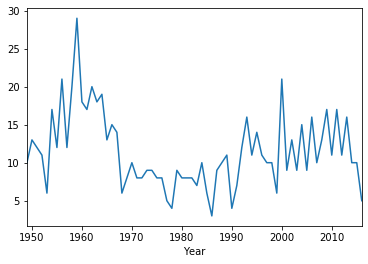

In [48]:
#para ver la evolución del # de muertos
%matplotlib inline
sharks_copy[sharks_copy["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"].plot()

En el  gráfico podemos ver la evolución anual del número de muertes por ataque de tiburón. Vemos que tuvo una tendencia negativa hasta la mitad de la década de los 80's, cuándo cambia esta tendencia y se invierte y vuelve a alcanzar valores 


In [49]:
sharks_copy[sharks_copy["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"]
sharks_copy[sharks_copy["Fatal (Y/N)"]=="N"].groupby(["Year"]).count()["Fatal (Y/N)"].head()

Year
1949    19
1950    30
1951    19
1952    18
1953    30
Name: Fatal (Y/N), dtype: int64

In [50]:
sharks_copy.columns

Index(['Case Number', 'Date', 'Year', 'Month', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'href formula'],
      dtype='object')

In [51]:
n_df=pd.DataFrame()
n_df['Dead']=sharks_copy[sharks_copy["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"]
n_df['Not Dead']=sharks_copy[sharks_copy["Fatal (Y/N)"]=="N"].groupby(["Year"]).count()["Fatal (Y/N)"]
n_df['No info']=sharks_copy[(sharks_copy["Fatal (Y/N)"]=="UNKNOWN")].groupby(["Year"]).count()["Fatal (Y/N)"]
n_df['No info'].fillna(0,inplace=True)
n_df.head()

,Dead,Not Dead,No info
Year,,,
1949,10,19,2.0
1950,13,30,0.0
1951,12,19,0.0
1952,11,18,0.0
1953,6,30,0.0


In [52]:
n_df['% Dead']=(n_df['Dead']/(n_df['Not Dead']+n_df['No info']+n_df['Dead'])*100)
display(n_df.head())
display(n_df.describe())

,Dead,Not Dead,No info,% Dead
Year,,,,
1949,10,19,2.0,32.258065
1950,13,30,0.0,30.232558
1951,12,19,0.0,38.709677
1952,11,18,0.0,37.931034
1953,6,30,0.0,16.666667


,Dead,Not Dead,No info,% Dead
count,67.000000,67.000000,67.000000,67.000000
mean,11.552239,51.373134,0.835821,20.595704
std,4.896763,29.852078,1.009005,9.013089
min,3.000000,16.000000,0.000000,4.854369
25%,8.000000,30.000000,0.000000,14.083333
50%,10.000000,40.000000,1.000000,19.354839
75%,14.500000,75.000000,1.000000,26.884523
max,29.000000,129.000000,4.000000,41.176471


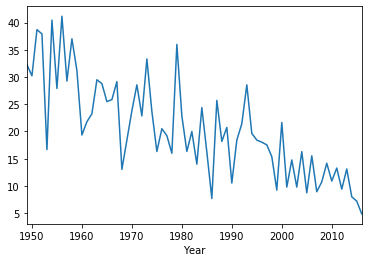

In [53]:
#para ver la evolución del # de muertos
%matplotlib inline
n_df["% Dead"].plot()

Podemos ver que con el paso de los años **la tasa de fatalidad de los ataques de tiburón** ha disminuido 
desde un **40% en los años 1950** hasta encontrarese la tasa entorno a un **10% durante la primera década de los 2000.**

In [54]:
sharks_copy['Species'].shape

(4302,)

In [55]:
sharks_copy['Species']=sharks_copy['Species'].apply(normal_species)

In [56]:
display(sharks_copy['Species'].value_counts().sum())

4271

In [57]:
sharks_copy['Species'].value_counts()

Unknown                            1688
Other                               809
White Shark                         536
Tiger Shark                         204
Bull Shark                          191
Sand Tiger Shark                    162
Shark involvement not confirmed     124
Blacktip Shark                       89
Bronze Whaler Shark                  72
Nurse Shark                          49
Shortfin Mako Shark                  48
Wobbegong Shark                      43
Great Hammerhead Shark               43
Blue Shark                           40
Lemon Shark                          28
Gray Reef Shark                      27
Oceanic Whitetip Shark               27
Spinner Shark                        20
Broadnose Sevengill Shark            16
Blacktip Reef Shark                  14
Dusky Shark                          11
Carpet Shark                          8
Dogfish Shark                         7
Sandbar Shark                         6
Galapagos Shark                       4


In [58]:
sharks_copy['Species'].fillna('Unknown', inplace=True)
sharks_copy.isnull().sum()

Case Number     0
Date            0
Year            0
Month           0
Type            0
Country         0
Area            0
Location        0
Activity        0
Sex             0
Age             0
Injury          0
Fatal (Y/N)     0
Time            0
Species         0
href formula    0
dtype: int64

In [59]:
movie_sharks = pd.read_csv('./ALL shark movies.csv', sep = ',', engine='python')

In [60]:
movie_sharks = movie_sharks [['Position','Title', 'Year']]

In [61]:
rows_to_delete= movie_sharks[(movie_sharks['Year']<1949)|(movie_sharks['Year'].isnull())|(movie_sharks['Year']>2016)]

In [62]:
movie_sharks.drop(rows_to_delete.index, axis=0, inplace = True)
movie_sharks.head()

,Position,Title,Year
0,1,Sharknado,2013.0
1,2,Sharknado 2: The Second One,2014.0
2,3,Sharknado 3: Oh Hell No!,2015.0
3,4,Sharknado 4: The 4th Awakens,2016.0
6,7,2-Headed Shark Attack,2012.0


In [63]:
movies_byyear=pd.DataFrame()

In [64]:
year = [i for i in range(1949,2017)]

In [65]:
movies_byyear['Year']= year
movies_byyear.head()

,Year
0,1949
1,1950
2,1951
3,1952
4,1953


In [66]:
df1=pd.DataFrame()
df1['Movies']=movie_sharks.groupby(['Year']).count()['Title']
df1 = df1.reset_index().rename_axis(None).rename_axis(None, axis=1)
df1['Year']= df1['Year'].astype(int)
df1.dtypes

Year      int64
Movies    int64
dtype: object

In [67]:
movies_byyear= movies_byyear.merge(df1,how='left', on='Year')

movies_byyear.head()

,Year,Movies
0,1949,NaN
1,1950,1.0
2,1951,NaN
3,1952,NaN
4,1953,NaN


In [68]:
movies_byyear['Movies'].fillna(0, inplace=True)

In [69]:
movies_byyear.set_index('Year', inplace=True)

In [70]:
movies_byyear.head()

,Movies
Year,
1949,0.0
1950,1.0
1951,0.0
1952,0.0
1953,0.0


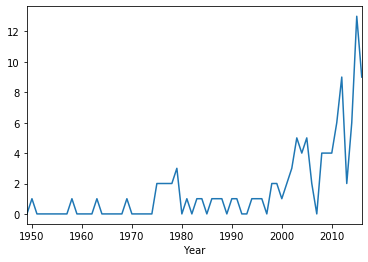

In [71]:
#para ver la evolución del # de películas
%matplotlib inline
movies_byyear["Movies"].plot()

In [72]:
first=sharks_copy[sharks_copy["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"]

In [73]:
second=movies_byyear["Movies"]

In [74]:
first = first.reset_index().rename_axis(None).rename_axis(None, axis=1)

In [75]:
first.columns

Index(['Year', 'Fatal (Y/N)'], dtype='object')

In [76]:
second.head()

Year
1949    0.0
1950    1.0
1951    0.0
1952    0.0
1953    0.0
Name: Movies, dtype: float64

In [77]:
second = second.reset_index().rename_axis(None).rename_axis(None, axis=1)

In [78]:
print(first.head())
print(second.head())

   Year  Fatal (Y/N)
0  1949           10
1  1950           13
2  1951           12
3  1952           11
4  1953            6
   Year  Movies
0  1949     0.0
1  1950     1.0
2  1951     0.0
3  1952     0.0
4  1953     0.0


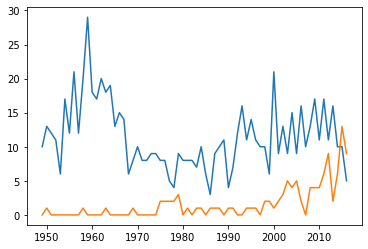

In [79]:
plt.plot(sharks_copy[sharks_copy["Fatal (Y/N)"]=="Y"].groupby(["Year"]).count()["Fatal (Y/N)"], label = 'Deaths')
plt.plot(movies_byyear["Movies"], label = 'Movies')

In [80]:
movies_byyear["Movies"].head()

Year
1949    0.0
1950    1.0
1951    0.0
1952    0.0
1953    0.0
Name: Movies, dtype: float64

In [81]:
sharks_copy.to_csv('Data_clean.csv', index=False)

In [82]:
movies_byyear.to_csv('Shark movies.csv', index=True)

In [83]:
movies_byyear.head()

,Movies
Year,
1949,0.0
1950,1.0
1951,0.0
1952,0.0
1953,0.0


In [84]:
sharks_copy[(sharks_copy['Fatal (Y/N)']=='Y')& (sharks_copy['Year']==1969)]

,Case Number,Date,Year,Month,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula


In [85]:
#sharks_0['Date'] = sharks_0['Date'].str.replace('?', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace(r'\w+efore ', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace('Beforer ', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace(r'Between', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace('Circa ', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace('Early ', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace(' or ', ',')
#sharks_0['Date'] = sharks_0['Date'].str.replace('-', ',')
#sharks_0['Date'] = sharks_0['Date'].str.replace('&', ',')
#sharks_0['Date'] = sharks_0['Date'].str.replace('Ca. ', '-')
#sharks_0['Date'] = sharks_0['Date'].str.replace(' B.C.', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace('.B.C..', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace('World War II', '1945')
#sharks_0['Date'] = sharks_0['Date'].str.replace('A few years ', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace('s', '')
#sharks_0['Date'] = sharks_0['Date'].str.replace('No date, ', '')
#sharks_0['Date']

In [86]:
#list(set(sharks_0['Date']))

In [87]:
#sharks_0['Case Number']